In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.drop('no.',axis=1,inplace=True)

In [5]:
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,EDA_smna_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,1.397968,0.141481,1.109299,1.678399,1.824289,1.088328,0.367977,4.319987,1.284376,1.952823,...,27,175,80,0,1,0,0,1,0,0
1,1.210132,0.091882,1.014138,1.485800,2.109146,1.223528,0.539150,4.459367,1.467865,2.852510,...,27,175,80,0,1,0,0,1,0,0
2,1.010977,0.102315,0.832216,1.190967,0.152828,0.128896,0.006950,0.544346,0.105091,0.244891,...,27,175,80,0,1,0,0,1,0,0
3,0.775187,0.046391,0.693996,0.876819,0.177595,0.126167,0.002789,0.361388,0.110786,0.199704,...,27,175,80,0,1,0,0,1,0,0
4,0.657494,0.034540,0.594667,0.718106,0.035014,0.039616,0.001144,0.132781,0.026716,0.114738,...,27,175,80,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.006155,0.002900,0.996533,1.013824,0.005391,0.004034,0.000659,0.014062,0.004986,0.016789,...,29,165,55,1,0,0,0,1,0,0
1174,1.004317,0.003385,0.997601,1.011113,0.010002,0.006730,0.000590,0.028034,0.006968,0.027377,...,29,165,55,1,0,0,0,1,0,0
1175,1.008017,0.002082,1.000110,1.011533,0.008592,0.006620,0.000192,0.023813,0.006563,0.022838,...,29,165,55,1,0,0,0,1,0,0
1176,1.005821,0.001771,1.000503,1.010117,0.004904,0.003361,0.000789,0.013490,0.004013,0.016423,...,29,165,55,1,0,0,0,1,0,0


In [6]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max',
       'EDA_smna_mean', 'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max',
       'EDA_tonic_mean', 'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max',
       'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max', 'TEMP_mean', 'TEMP_std',
       'TEMP_min', 'TEMP_max', 'ACC_x_mean', 'ACC_x_std', 'ACC_x_min',
       'ACC_x_max', 'ACC_y_mean', 'ACC_y_std', 'ACC_y_min', 'ACC_y_max',
       'ACC_z_mean', 'ACC_z_std', 'ACC_z_min', 'ACC_z_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'BVP_peak_freq', 'TEMP_slope',
       'subject', 'label', 'age', 'height', 'weight', 'gender_ female',
       'gender_ male', 'coffee_today_YES', 'sport_today_YES', 'smoker_NO',
       'smoker_YES', 'feel_ill_today_YES'],
      dtype='object')

In [7]:
np.unique(df['label'])

array([0, 1, 2], dtype=int64)

In [8]:
labels = {
    0: "Amused",
    1: "Neutral",
    2: "Stressed"
}

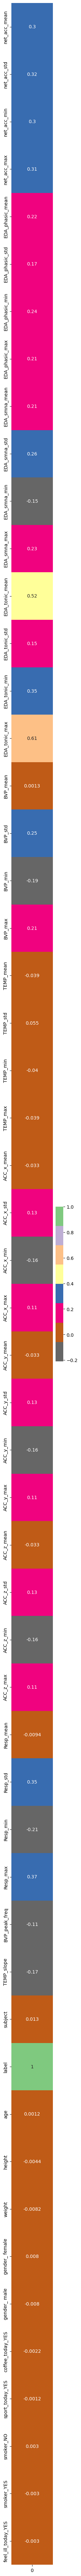

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2,100))
cor = df.corr()
n_targets = len(df.columns)
cor_target = cor['label'].values.reshape(n_targets, 1)
cor_features = cor['label'].keys()
ax = sns.heatmap(cor_target, annot=True, cmap=plt.cm.Accent_r)
ax.set_yticklabels(cor_features)
plt.show()

In [10]:

selected_feats =   [
    'BVP_mean', 'BVP_std', 'EDA_phasic_mean', 'EDA_phasic_min', 'EDA_smna_min', 
    'EDA_tonic_mean', 'Resp_mean', 'Resp_std', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
    'BVP_peak_freq', 'age', 'height', 'weight'
    ]

X = df[selected_feats]
y = df['label']

X.shape, y.shape

((1178, 15), (1178,))

In [22]:
X.head()

,BVP_mean,BVP_std,EDA_phasic_mean,EDA_phasic_min,EDA_smna_min,EDA_tonic_mean,Resp_mean,Resp_std,TEMP_mean,TEMP_std,TEMP_slope,BVP_peak_freq,age,height,weight
0,-0.181673,107.648359,1.824289,0.367977,5.230000e-08,1.232164,0.148184,2.935617,35.817091,0.012674,-0.000169,0.135670,27,175,80
1,-0.830147,118.742089,2.109146,0.539150,3.100000e-08,0.377615,0.037545,2.843123,35.797568,0.029901,-0.000789,0.095023,27,175,80
2,0.939683,42.190039,0.152828,0.006950,4.730000e-08,1.727696,-0.021862,1.700333,35.712909,0.027612,-0.000717,0.076880,27,175,80
3,0.107404,41.606872,0.177595,0.002789,2.790000e-08,0.987927,0.097563,1.483260,35.700811,0.019504,0.000075,0.140271,27,175,80
4,-0.073620,43.121633,0.035014,0.001144,5.170000e-08,0.772262,0.062545,1.501585,35.744727,0.019386,0.000442,0.149321,27,175,80


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=0)
y_train, y_test = train_test_split(y, test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((1060, 15), (118, 15))

In [13]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
def accuracy(predicted, actual):
    n = 0
    for p, a in zip(predicted, actual):
        if p == a:
            n += 1
    return n/len(predicted) * 100

In [15]:
def predict(arr):
    arr = np.array(arr)

    global model
    result = model.predict(arr.reshape(1,-1)).flatten()
    # _prob = model.predict_proba(arr.reshape(1,-1)).flatten()
    return result

In [16]:
predicted = []
for data in X_test.values:
    predicted.append(predict(data))
predicted

accuracy(predicted, y_test.values)

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages

96.61016949152543

In [18]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
load_model=pickle.load(open(filename,"rb"))

In [23]:
load_model.predict([[0.107404,41.606872,0.177595,0.002789,2.790000e-08,0.987927,0.097563,1.483260,35.700811,0.019504,0.000075,0.140271,27,175,80]])

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)